In [1]:
import pandas as pd
import os
import shutil
import json
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
IMG_PATH            = '../assignment_data_bdd/bdd100k_images_100k/bdd100k/images/100k/'
LABELS_PATH         = f'../assignment_data_bdd/bdd100k_labels_release/bdd100k/labels'
TRAIN_LABELS_JSON   = f'{LABELS_PATH}/bdd100k_labels_images_train.json'
VAL_LABELS_JSON     = f'{LABELS_PATH}/bdd100k_labels_images_val.json'
TRAIN_IMAGES_PATH   = f'{IMG_PATH}/train'

In [3]:
train_df = pd.read_json(TRAIN_LABELS_JSON)

In [4]:
train_df.shape

(69863, 4)

In [5]:
val_df = pd.read_json(VAL_LABELS_JSON)

In [6]:
val_df.shape

(10000, 4)

In [7]:
train_df.head()

name                                         attributes  \
0  0000f77c-6257be58.jpg  {'weather': 'clear', 'scene': 'city street', '...   
1  0000f77c-62c2a288.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
2  0000f77c-cb820c98.jpg  {'weather': 'clear', 'scene': 'residential', '...   
3  0001542f-5ce3cf52.jpg  {'weather': 'clear', 'scene': 'city street', '...   
4  0001542f-7c670be8.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   

   timestamp                                             labels  
0      10000  [{'category': 'traffic light', 'attributes': {...  
1      10000  [{'category': 'traffic sign', 'attributes': {'...  
2      10000  [{'category': 'car', 'attributes': {'occluded'...  
3      10000  [{'category': 'traffic sign', 'attributes': {'...  
4      10000  [{'category': 'car', 'attributes': {'occluded'...

In [8]:
train_df.tail()

name  \
69858  fe172415-3c36f3d1.jpg   
69859  fe189115-11bedd21.jpg   
69860  fe189115-352995ee.jpg   
69861  fe189115-354e7981.jpg   
69862  fe189115-8dabb5b1.jpg   

                                              attributes  timestamp  \
69858  {'weather': 'overcast', 'scene': 'highway', 't...      10000   
69859  {'weather': 'partly cloudy', 'scene': 'city st...      10000   
69860  {'weather': 'undefined', 'scene': 'city street...      10000   
69861  {'weather': 'undefined', 'scene': 'city street...      10000   
69862  {'weather': 'undefined', 'scene': 'highway', '...      10000   

                                                  labels  
69858  [{'category': 'car', 'attributes': {'occluded'...  
69859  [{'category': 'car', 'attributes': {'occluded'...  
69860  [{'category': 'traffic light', 'attributes': {...  
69861  [{'category': 'traffic light', 'attributes': {...  
69862  [{'category': 'traffic sign', 'attributes': {'...

In [9]:
val_df.head()

name                                         attributes  \
0  b1c66a42-6f7d68ca.jpg  {'weather': 'overcast', 'scene': 'city street'...   
1  b1c81faa-3df17267.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
2  b1c81faa-c80764c5.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
3  b1c9c847-3bda4659.jpg  {'weather': 'undefined', 'scene': 'city street...   
4  b1ca2e5d-84cf9134.jpg  {'weather': 'clear', 'scene': 'city street', '...   

   timestamp                                             labels  
0      10000  [{'category': 'traffic sign', 'attributes': {'...  
1      10000  [{'category': 'car', 'attributes': {'occluded'...  
2      10000  [{'category': 'traffic sign', 'attributes': {'...  
3      10000  [{'category': 'traffic sign', 'attributes': {'...  
4      10000  [{'category': 'car', 'attributes': {'occluded'...

In [10]:
print(train_df['timestamp'].unique())
print(val_df['timestamp'].unique())

[10000]
[10000]


In [11]:
train_df.drop(['timestamp'], axis=1, inplace=True)
val_df.drop(['timestamp'], axis=1, inplace=True)

In [12]:
train_df.iloc[1,0]

'0000f77c-62c2a288.jpg'

In [13]:
train_df.iloc[1,2]

[{'category': 'traffic sign',
  'attributes': {'occluded': False,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 250.549246,
   'y1': 294.619798,
   'x2': 308.085801,
   'y2': 357.05308},
  'id': 11},
 {'category': 'traffic sign',
  'attributes': {'occluded': True,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 206.478694,
   'y1': 299.516526,
   'x2': 221.16888,
   'y2': 321.551802},
  'id': 12},
 {'category': 'traffic sign',
  'attributes': {'occluded': False,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 924.665474,
   'y1': 286.866651,
   'x2': 936.907294,
   'y2': 297.884289},
  'id': 13},
 {'category': 'person',
  'attributes': {'occluded': False,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': Tr

### Finding Duplicate Images
This was done because yolo on a dry run found a few duplicate images.
These duplicate images were not named the same.

In [14]:
# Check for duplicate filenames
print(train_df['name'][train_df['name'].duplicated()].unique())
print(val_df['name'][train_df['name'].duplicated()].unique())

[]
[]


In [15]:
# !pip install pillow imagehash

### Find dupes using hashing
I took an attempt to exactly pinpoint the same image using hashing and comparing bit hashes

In [16]:
# import os
# from PIL import Image
# import imagehash
# from itertools import combinations

# # Path to your image folder
# folder_path = TRAIN_IMAGES_PATH  # change this

# # Choose your hash method: phash, average_hash, dhash, or whash
# hash_func = imagehash.average_hash

# # Store hashes and filenames
# image_hashes = {}

# # Step 1: Compute hashes
# for filename in os.listdir(folder_path):
#     if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
#         filepath = os.path.join(folder_path, filename)
#         try:
#             img = Image.open(filepath)
#             img_hash = hash_func(img)
#             image_hashes[filename] = img_hash
#         except Exception as e:
#             print(f"Error processing {filename}: {e}")

In [17]:
# # Convert hashes to strings for JSON serialization
# hash_dict_serializable = {fname: str(h) for fname, h in image_hashes.items()}

# # Save to JSON file
# with open("image_hashes.json", "w") as f:
#     json.dump(hash_dict_serializable, f, indent=4)

# print("✅ Image hashes saved to image_hashes.json")


In [18]:
# from collections import defaultdict
# import imagehash
# from PIL import Image
# import os

# folder = TRAIN_IMAGES_PATH
# hash_func = imagehash.average_hash
# bucket_size = 8  # Use first 8 hex digits (~32 bits)

# # Step 1: Create buckets
# buckets = defaultdict(list)
# for fname in os.listdir(folder):
#     if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
#         try:
#             img = Image.open(os.path.join(folder, fname))
#             h = str(hash_func(img))[:bucket_size]
#             buckets[h].append((fname, hash_func(img)))
#         except:
#             continue


In [19]:
# # Step 2: Compare within buckets
# threshold = 0
# results = []
# for bucket in buckets.values():
#     for i in range(len(bucket)):
#         for j in range(i + 1, len(bucket)):
#             diff = bucket[i][1] - bucket[j][1]
#             if diff <= threshold:
#                 results.append((bucket[i][0], bucket[j][0], diff))

In [20]:
# df_results = pd.DataFrame(results, columns=["Image 1", "Image 2", "Hash Difference"])
# df_results.to_csv("similar_images.csv", index=False)
# print("✅ Results saved to similar_images.csv")


### Checking the unique values in each column

In [21]:
set(train_df['attributes'].apply(lambda x: x['weather']).tolist())

{'clear', 'foggy', 'overcast', 'partly cloudy', 'rainy', 'snowy', 'undefined'}

In [22]:
set(val_df['attributes'].apply(lambda x: x['weather']).tolist())

{'clear', 'foggy', 'overcast', 'partly cloudy', 'rainy', 'snowy', 'undefined'}

In [23]:
set(train_df['attributes'].apply(lambda x: x['scene']).tolist())

{'city street',
 'gas stations',
 'highway',
 'parking lot',
 'residential',
 'tunnel',
 'undefined'}

In [24]:
set(val_df['attributes'].apply(lambda x: x['scene']).tolist())

{'city street',
 'gas stations',
 'highway',
 'parking lot',
 'residential',
 'tunnel',
 'undefined'}

In [25]:
set(train_df['attributes'].apply(lambda x: x['timeofday']).tolist())

{'dawn/dusk', 'daytime', 'night', 'undefined'}

In [26]:
set(val_df['attributes'].apply(lambda x: x['timeofday']).tolist())

{'dawn/dusk', 'daytime', 'night', 'undefined'}

### Analysing the count of each value in different columns

In [27]:
def bar_chart(column, title, xlabel, is_training):
    if is_training:
        data = Counter(train_df['attributes'].apply(lambda x: x[column]).tolist())
    else:
        data = Counter(val_df['attributes'].apply(lambda x: x[column]).tolist())
    print(data)
    labels, values = zip(*data.items())

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.title(f"{title} Distribution")
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Counter({'clear': 37344, 'overcast': 8770, 'undefined': 8119, 'snowy': 5549, 'rainy': 5070, 'partly cloudy': 4881, 'foggy': 130})


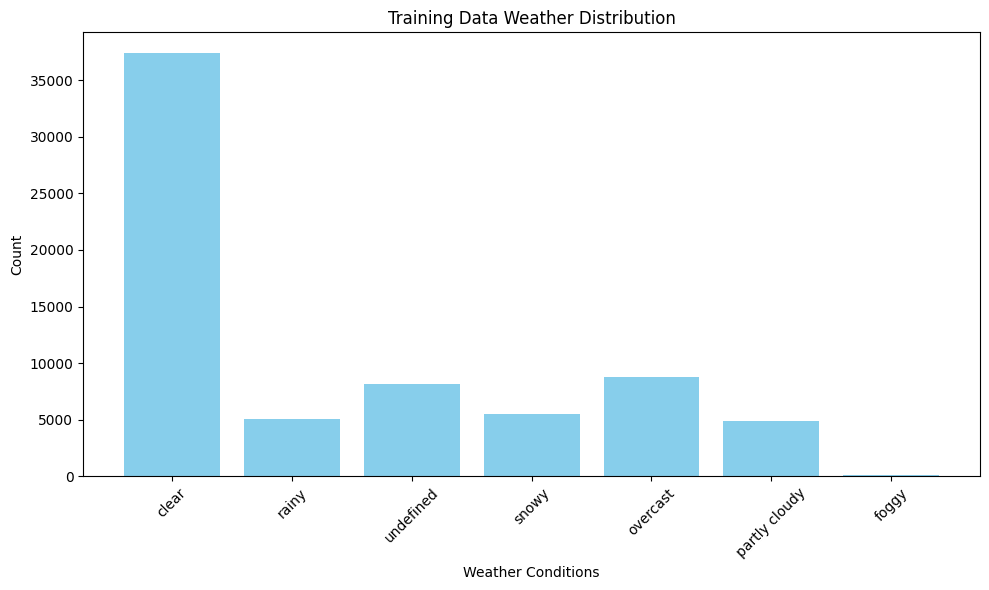

In [28]:
bar_chart('weather', 'Training Data Weather', 'Weather Conditions', True)

Counter({'clear': 5346, 'overcast': 1239, 'undefined': 1157, 'snowy': 769, 'rainy': 738, 'partly cloudy': 738, 'foggy': 13})


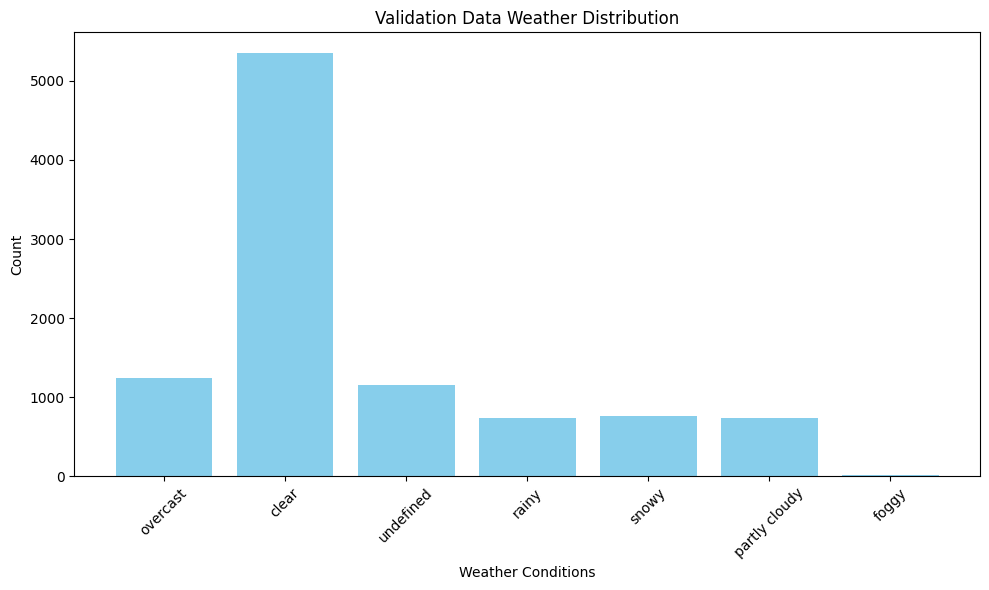

In [29]:
bar_chart('weather', 'Validation Data Weather', 'Weather Conditions', False)

Counter({'city street': 43516, 'highway': 17379, 'residential': 8074, 'parking lot': 377, 'undefined': 361, 'tunnel': 129, 'gas stations': 27})


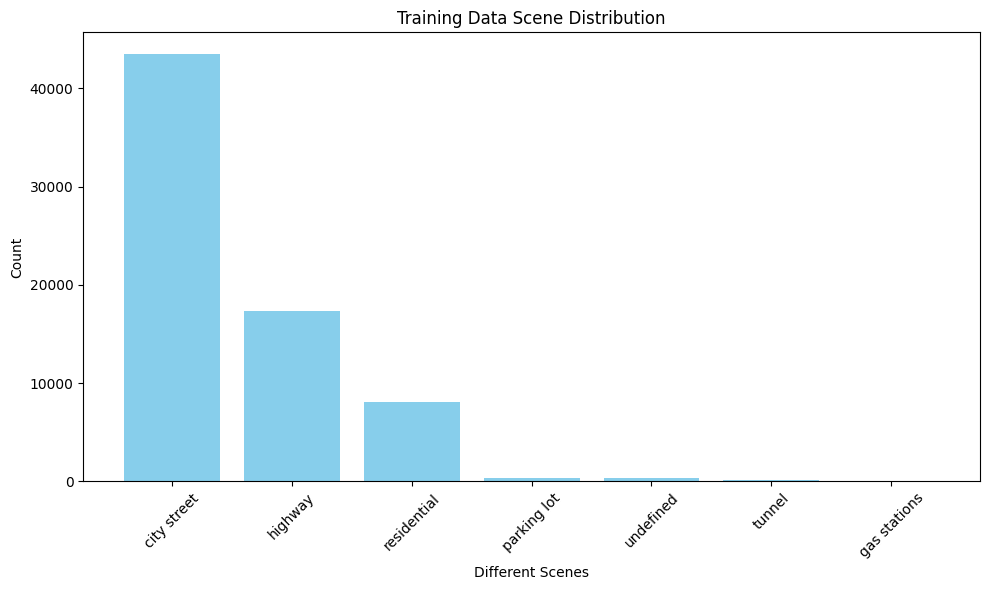

In [30]:
bar_chart('scene', 'Training Data Scene', 'Different Scenes', True)

Counter({'city street': 6112, 'highway': 2499, 'residential': 1253, 'undefined': 53, 'parking lot': 49, 'tunnel': 27, 'gas stations': 7})


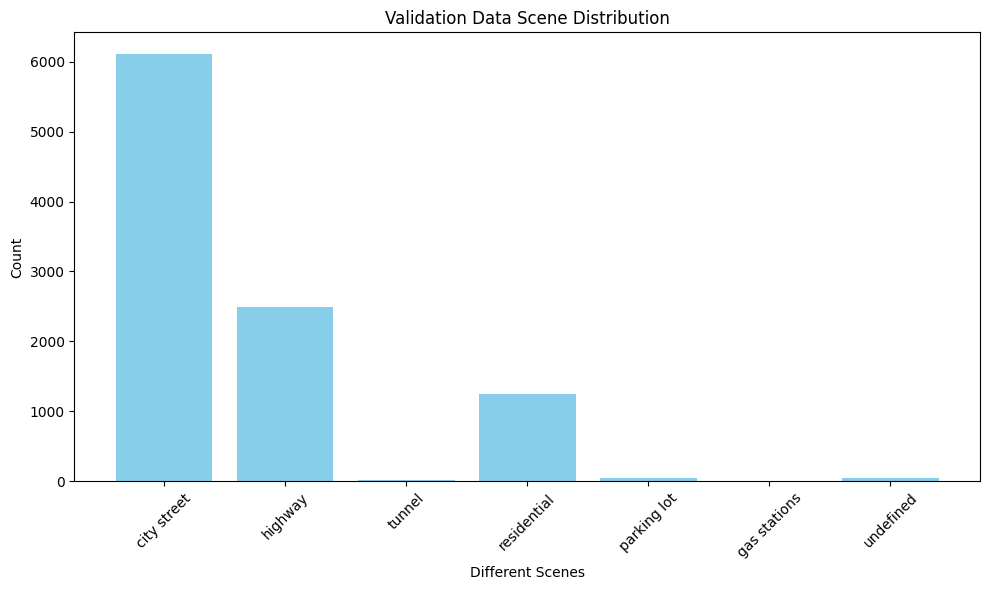

In [31]:
bar_chart('scene', 'Validation Data Scene', 'Different Scenes', False)

Counter({'daytime': 36728, 'night': 27971, 'dawn/dusk': 5027, 'undefined': 137})


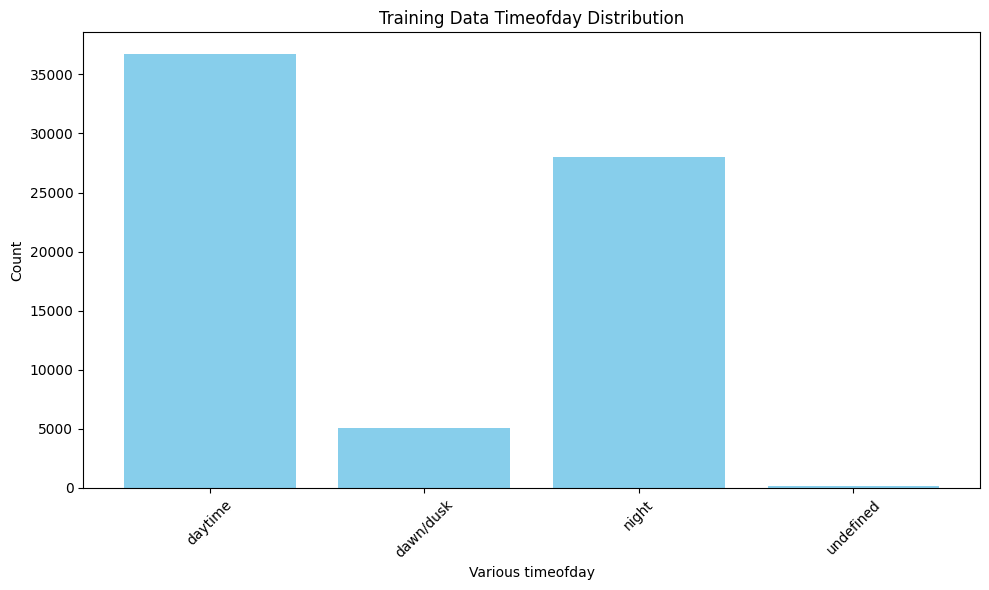

In [32]:
bar_chart('timeofday', 'Training Data Timeofday', 'Various timeofday', True)

Counter({'daytime': 5258, 'night': 3929, 'dawn/dusk': 778, 'undefined': 35})


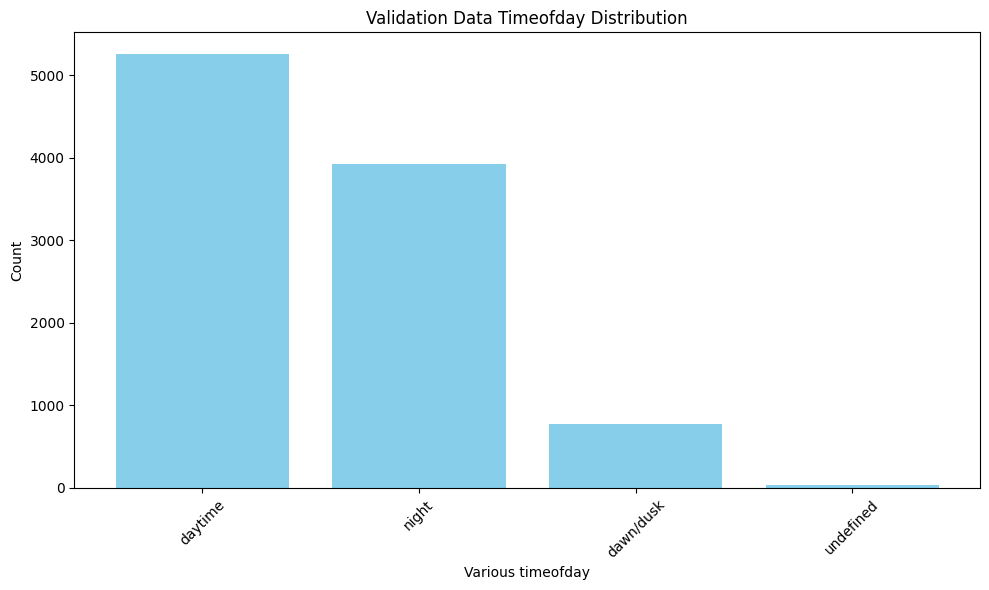

In [33]:
bar_chart('timeofday', 'Validation Data Timeofday', 'Various timeofday', False)

### Creating new columns for each attribute

In [34]:
train_df['weather'] = train_df['attributes'].apply(lambda x: x['weather'])
train_df['scene'] = train_df['attributes'].apply(lambda x: x['scene'])
train_df['timeofday'] = train_df['attributes'].apply(lambda x: x['timeofday'])

In [35]:
val_df['weather'] = val_df['attributes'].apply(lambda x: x['weather'])
val_df['scene'] = val_df['attributes'].apply(lambda x: x['scene'])
val_df['timeofday'] = val_df['attributes'].apply(lambda x: x['timeofday'])

In [36]:
train_df.head(10)

name                                         attributes  \
0  0000f77c-6257be58.jpg  {'weather': 'clear', 'scene': 'city street', '...   
1  0000f77c-62c2a288.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
2  0000f77c-cb820c98.jpg  {'weather': 'clear', 'scene': 'residential', '...   
3  0001542f-5ce3cf52.jpg  {'weather': 'clear', 'scene': 'city street', '...   
4  0001542f-7c670be8.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
5  0001542f-ec815219.jpg  {'weather': 'clear', 'scene': 'city street', '...   
6  0004974f-05e1c285.jpg  {'weather': 'rainy', 'scene': 'highway', 'time...   
7  00054602-3bf57337.jpg  {'weather': 'clear', 'scene': 'city street', '...   
8  00067cfb-5443fe39.jpg  {'weather': 'clear', 'scene': 'city street', '...   
9  00067cfb-5adfaaa7.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   

                                              labels weather        scene  \
0  [{'category': 'traffic light', 'attributes': {...   clear  city street   
1  [{'category': 'traffic sign', 'attributes': {'...   clear      highway   
2  [{'category': 'car', 'attributes': {'occluded'...   clear  residential   
3  [{'category': 'traffic sign', 'attributes': {'...   clear  city street   
4  [{'category': 'car', 'attributes': {'occluded'...   clear      highway   
5  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
6  [{'category': 'car', 'attributes': {'occluded'...   rainy      highway   
7  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
8  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
9  [{'category': 'traffic sign', 'attributes': {'...   clear      highway   

   timeofday  
0    daytime  
1  dawn/dusk  
2  dawn/dusk  
3      night  
4      night  
5      night  
6      night  
7    daytime  
8    daytime  
9      night

### Creating new columns for each Class with its count

In [37]:
train_df['categories'] = train_df['labels'].apply(lambda x: [item['category'] for item in x])

counts = train_df['categories'].apply(pd.Series).stack().reset_index(level=1, drop=True)
dummies = pd.get_dummies(counts)
counts_per_row = dummies.groupby(dummies.index).sum()

train_df = train_df.join(counts_per_row)

In [38]:
train_df.drop(['lane', 'drivable area'], axis=1, inplace=True)

In [39]:
train_df.head(10)

name                                         attributes  \
0  0000f77c-6257be58.jpg  {'weather': 'clear', 'scene': 'city street', '...   
1  0000f77c-62c2a288.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
2  0000f77c-cb820c98.jpg  {'weather': 'clear', 'scene': 'residential', '...   
3  0001542f-5ce3cf52.jpg  {'weather': 'clear', 'scene': 'city street', '...   
4  0001542f-7c670be8.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
5  0001542f-ec815219.jpg  {'weather': 'clear', 'scene': 'city street', '...   
6  0004974f-05e1c285.jpg  {'weather': 'rainy', 'scene': 'highway', 'time...   
7  00054602-3bf57337.jpg  {'weather': 'clear', 'scene': 'city street', '...   
8  00067cfb-5443fe39.jpg  {'weather': 'clear', 'scene': 'city street', '...   
9  00067cfb-5adfaaa7.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   

                                              labels weather        scene  \
0  [{'category': 'traffic light', 'attributes': {...   clear  city street   
1  [{'category': 'traffic sign', 'attributes': {'...   clear      highway   
2  [{'category': 'car', 'attributes': {'occluded'...   clear  residential   
3  [{'category': 'traffic sign', 'attributes': {'...   clear  city street   
4  [{'category': 'car', 'attributes': {'occluded'...   clear      highway   
5  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
6  [{'category': 'car', 'attributes': {'occluded'...   rainy      highway   
7  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
8  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
9  [{'category': 'traffic sign', 'attributes': {'...   clear      highway   

   timeofday                                         categories  bike  bus  \
0    daytime  [traffic light, traffic light, traffic sign, t...     0    0   
1  dawn/dusk  [traffic sign, traffic sign, traffic sign, per...     0    0   
2  dawn/dusk  [car, car, car, car, car, car, car, drivable a...     0    0   
3      night  [traffic sign, traffic light, traffic light, c...     0    1   
4      night  [car, car, person, car, traffic light, traffic...     0    0   
5      night  [car, car, car, car, car, car, car, car, traff...     0    0   
6      night  [car, car, car, car, car, car, drivable area, ...     0    0   
7    daytime  [car, car, car, car, car, drivable area, lane,...     0    0   
8    daytime  [car, car, car, car, car, car, car, car, car, ...     0    0   
9      night  [traffic sign, traffic sign, traffic sign, tra...     0    0   

   car  motor  person  rider  traffic light  traffic sign  train  truck  
0    2      0       0      0              2             3      0      0  
1    0      0       3      0              0             3      0      0  
2    7      0       0      0              0             0      0      0  
3    9      0       0      0              2             1      0      0  
4    3      0       1      0              2             2      0      0  
5    9      0       0      0              0             2      0      0  
6    6      0       0      0              0             0      0      0  
7    5      0       0      0              0             0      0      0  
8   17      0       1      0              3             2      0      0  
9    7      0       0      0              0             7      0      1

### Creating new column for every class under Categories

In [40]:
val_df['categories'] = val_df['labels'].apply(lambda x: [item['category'] for item in x])

counts = val_df['categories'].apply(pd.Series).stack().reset_index(level=1, drop=True)
dummies = pd.get_dummies(counts)
counts_per_row = dummies.groupby(dummies.index).sum()

val_df = val_df.join(counts_per_row)

In [41]:
val_df.drop(['lane', 'drivable area'], axis=1, inplace=True)

In [54]:
all_categories = [item['category'] for row in train_df['labels'] for item in row if item['category'] not in ['lane', 'drivable area']]

category_counts = Counter(all_categories)

train_category_count_df = pd.DataFrame(category_counts.items(), columns=["Category", "Count"]).sort_values(by="Count", ascending=False)
print(train_category_count_df)

        Category   Count
2            car  713211
1   traffic sign  239686
0  traffic light  186117
3         person   91349
5          truck   29971
4            bus   11672
7           bike    7210
6          rider    4517
8          motor    3002
9          train     136


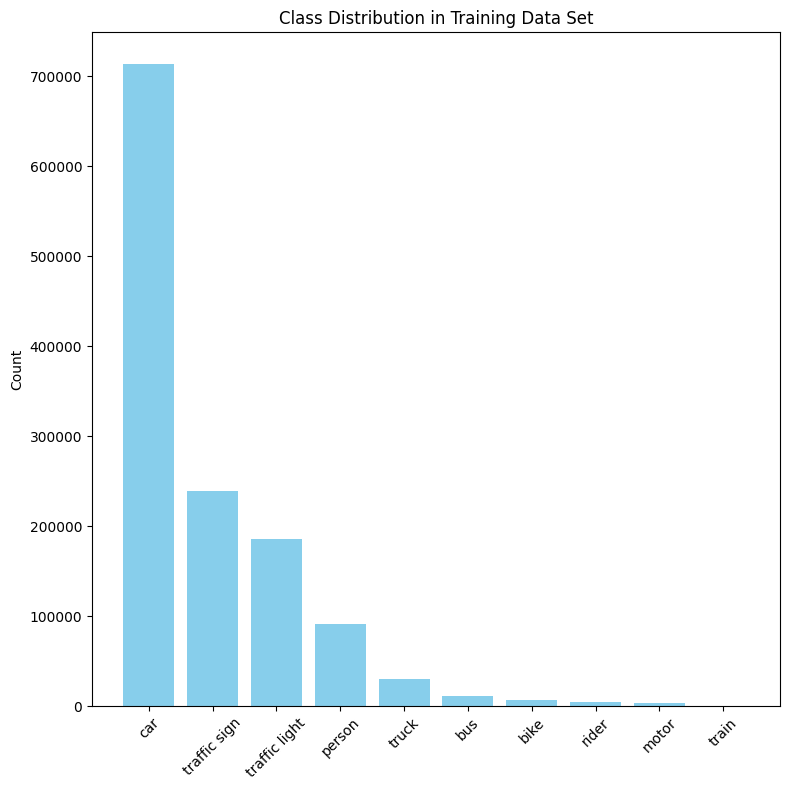

In [55]:
plt.figure(figsize=(8, 8))
plt.bar(train_category_count_df['Category'], train_category_count_df['Count'], color='skyblue')
plt.title(f"Class Distribution in Training Data Set")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [56]:
all_categories = [item['category'] for row in val_df['labels'] for item in row if item['category'] not in ['lane', 'drivable area']]

category_counts = Counter(all_categories)

val_category_count_df = pd.DataFrame(category_counts.items(), columns=["Category", "Count"]).sort_values(by="Count", ascending=False)
print(val_category_count_df)

        Category   Count
2            car  102506
0   traffic sign   34908
1  traffic light   26885
5         person   13262
7          truck    4245
6            bus    1597
8           bike    1007
3          rider     649
4          motor     452
9          train      15


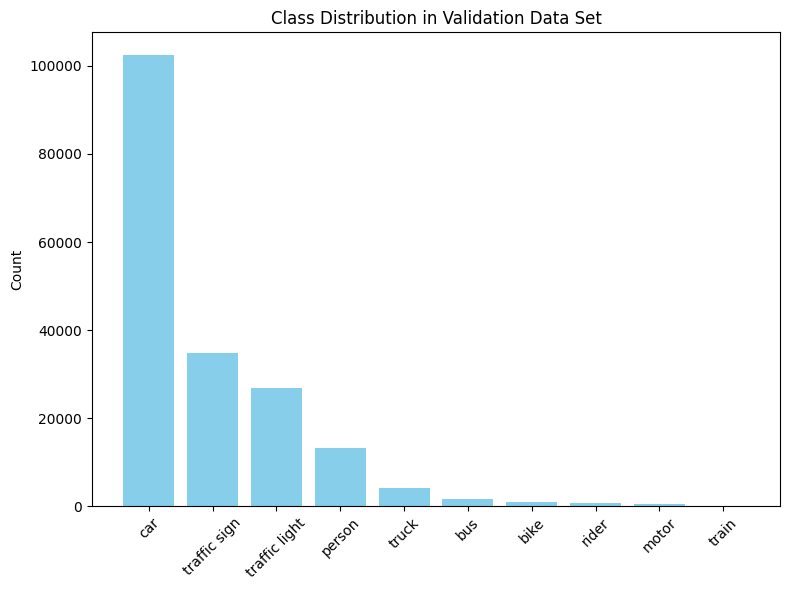

In [57]:
plt.figure(figsize=(8, 6))
plt.bar(val_category_count_df['Category'], val_category_count_df['Count'], color='skyblue')
plt.title(f"Class Distribution in Validation Data Set")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [58]:
print(set(all_categories))
class_cols = list(set(all_categories))

{'motor', 'car', 'rider', 'traffic sign', 'person', 'train', 'traffic light', 'bike', 'truck', 'bus'}


In [59]:
def attributes_groupby_plot(column_name):
    group = train_df.groupby(column_name)[class_cols].sum()

    fig, axes = plt.subplots(nrows=len(group), figsize=(10, 4 * len(group)))
    
    if len(group) == 1:
        axes = [axes]
    
    for ax, (attribute_name, row) in zip(axes, group.iterrows()):
        top_classes = row.sort_values(ascending=False).head(5)
        ax.bar(top_classes.index, top_classes.values, color='teal')
        ax.set_title(f"{column_name}: {attribute_name}")
        ax.set_ylabel("Count")
        ax.set_xticks(range(len(top_classes.index)))
        ax.set_xticklabels(top_classes.index, rotation=45)
    
    plt.tight_layout()
    plt.show()

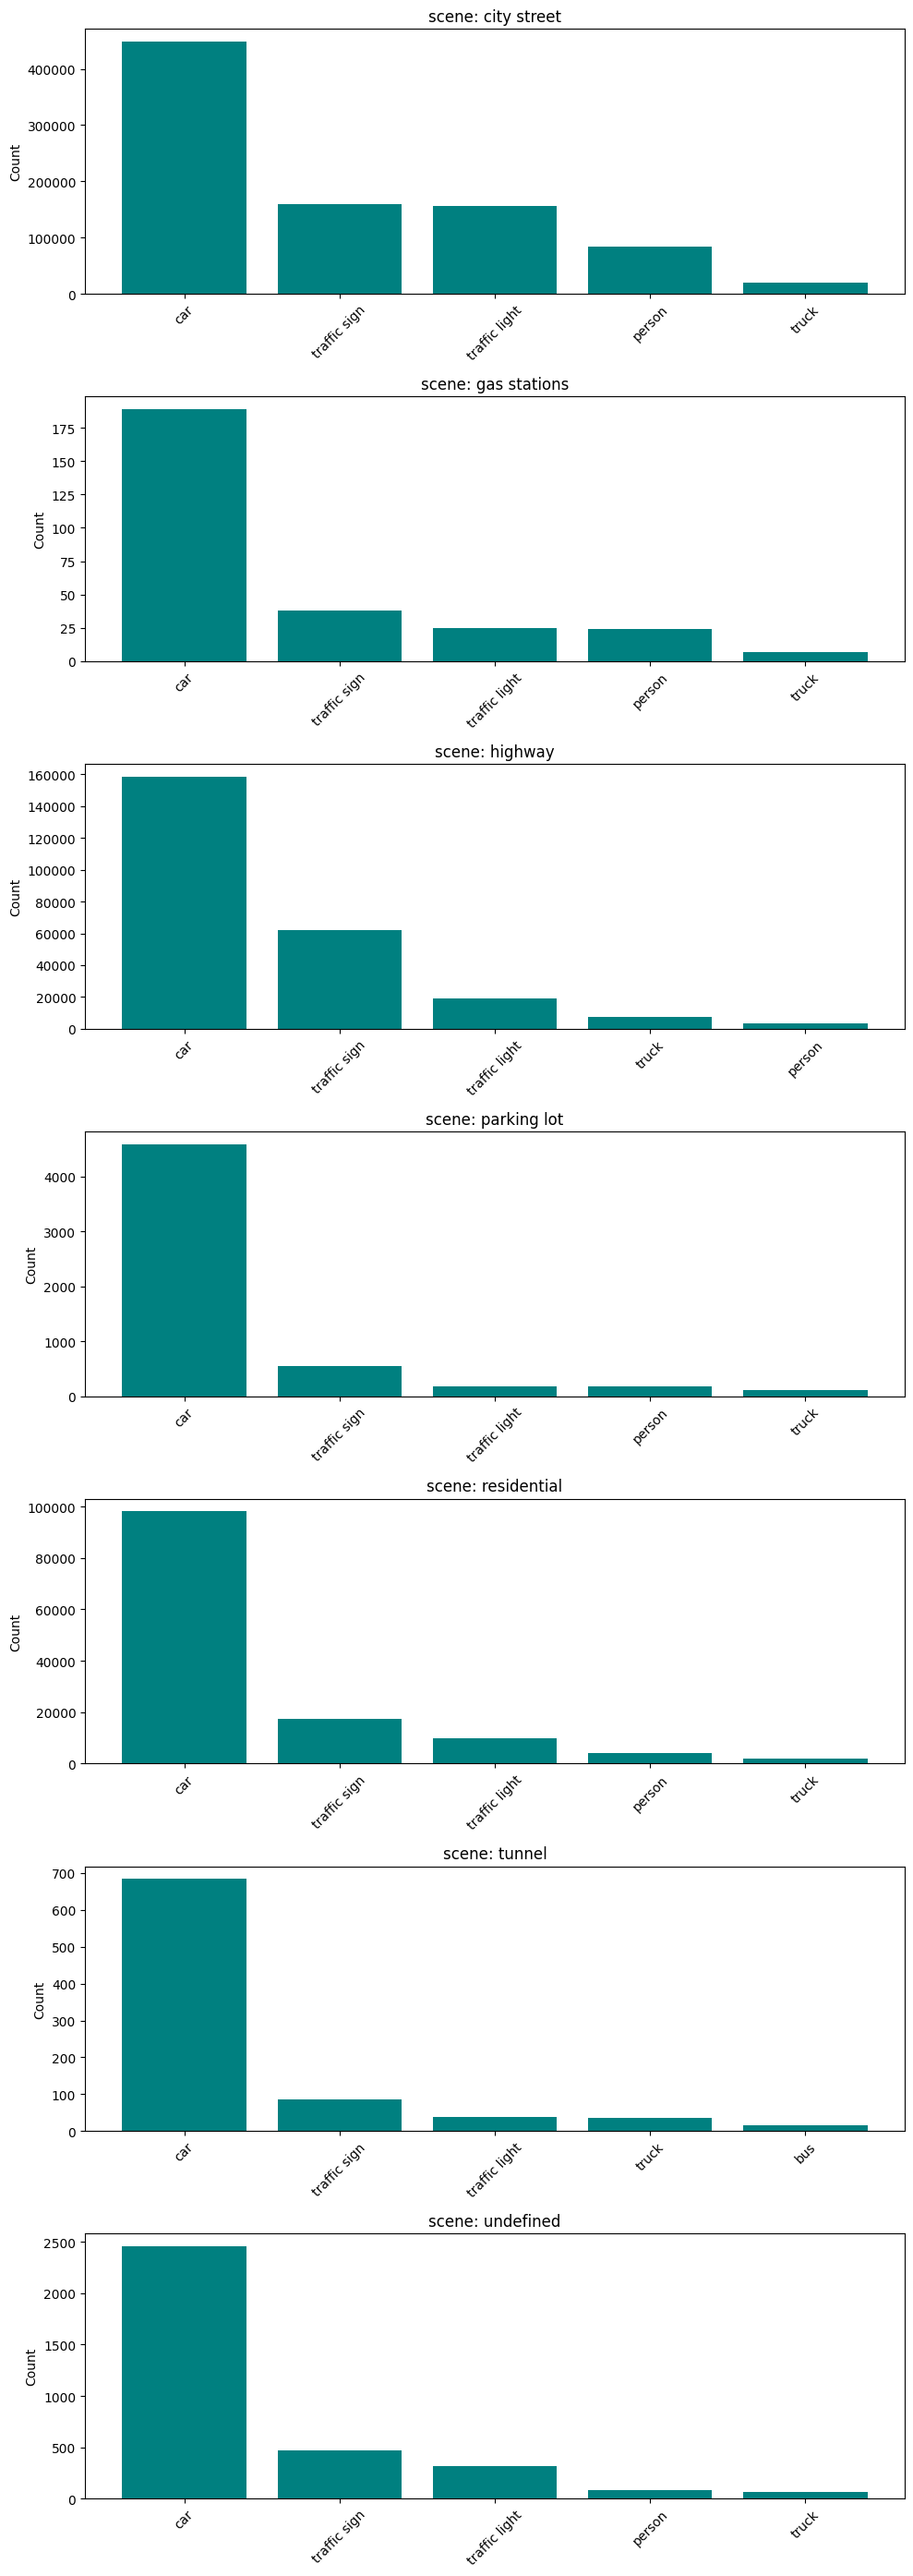

In [60]:
attributes_groupby_plot('scene')

### Plotting results grouped by weather

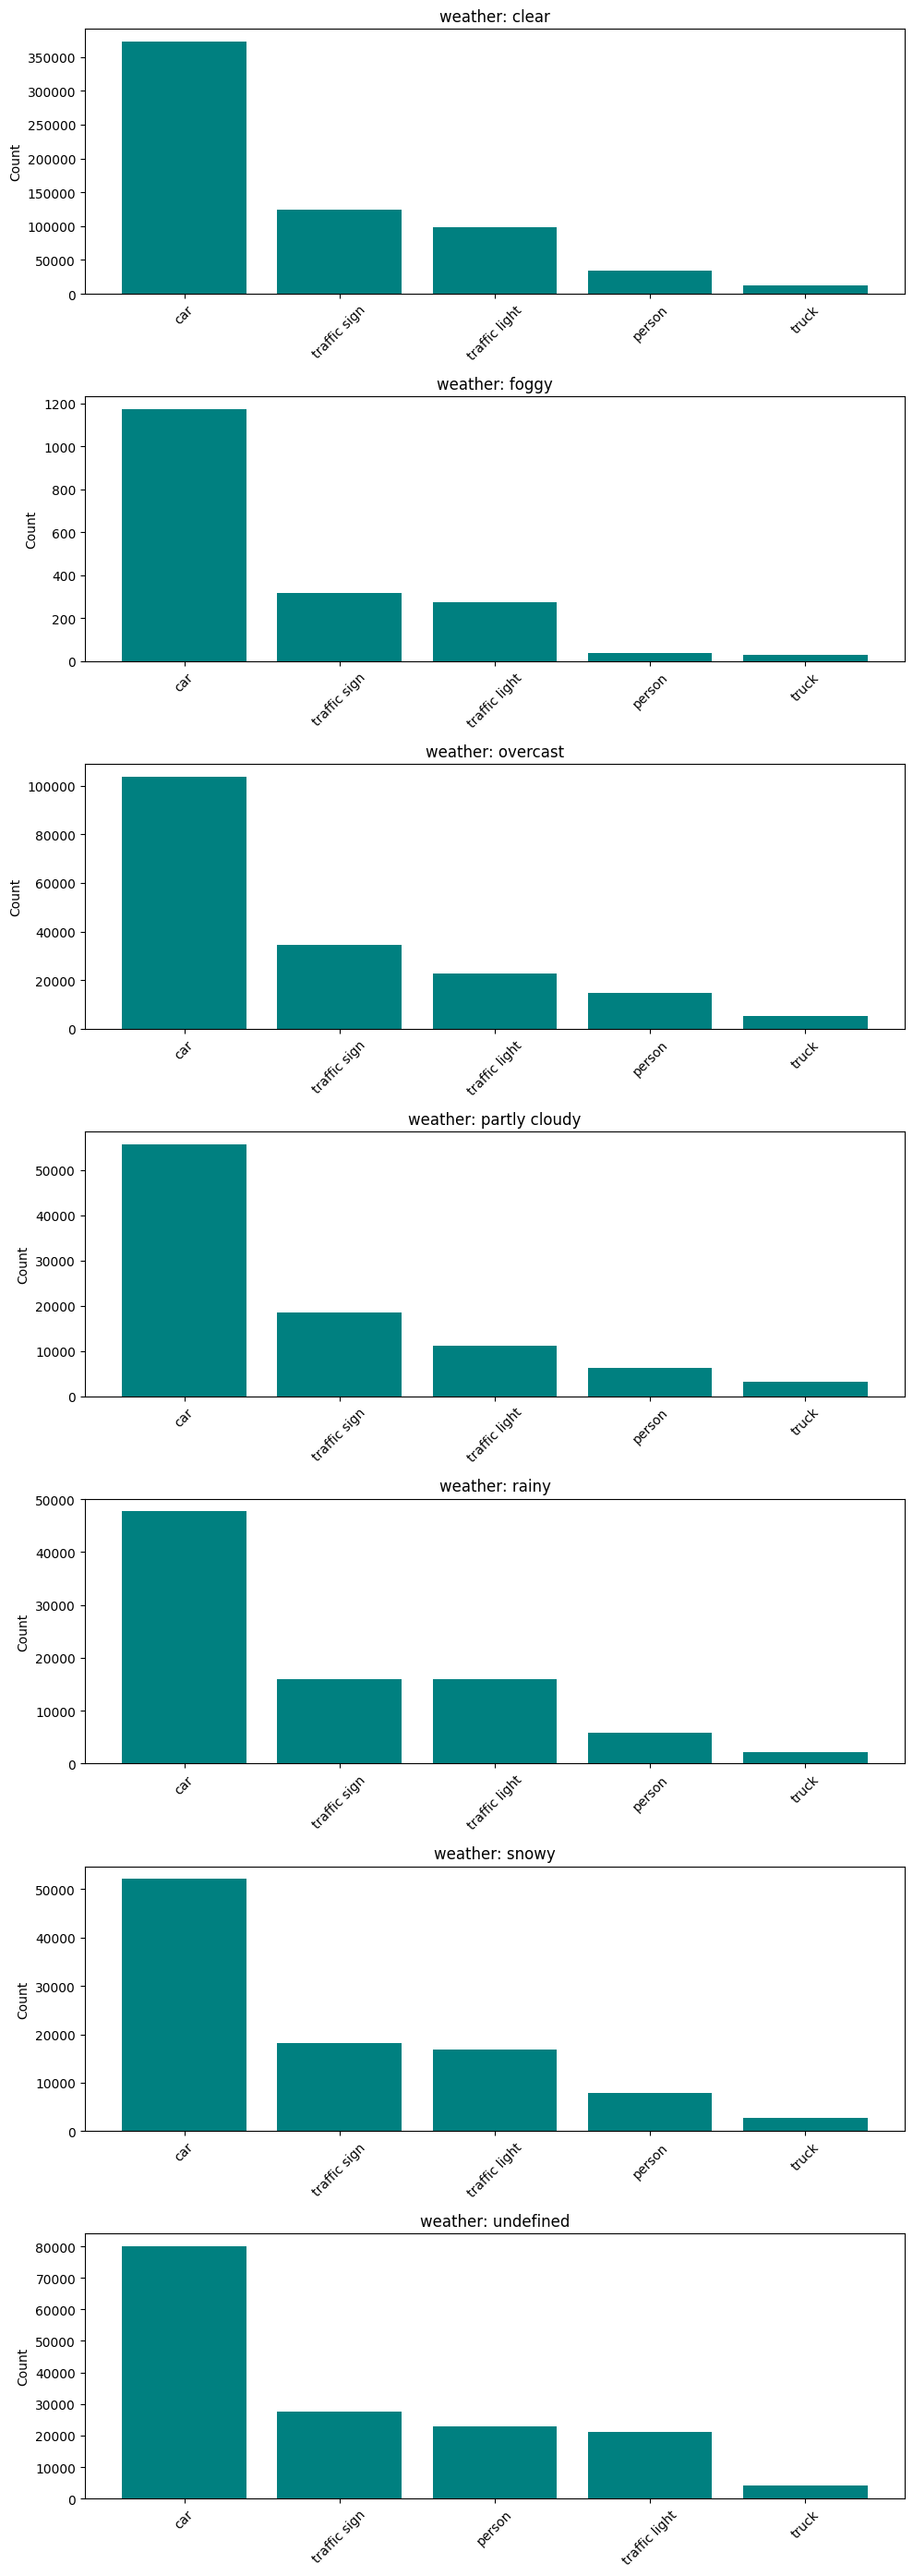

In [61]:
attributes_groupby_plot('weather')

### Plotting results grouped by time of day

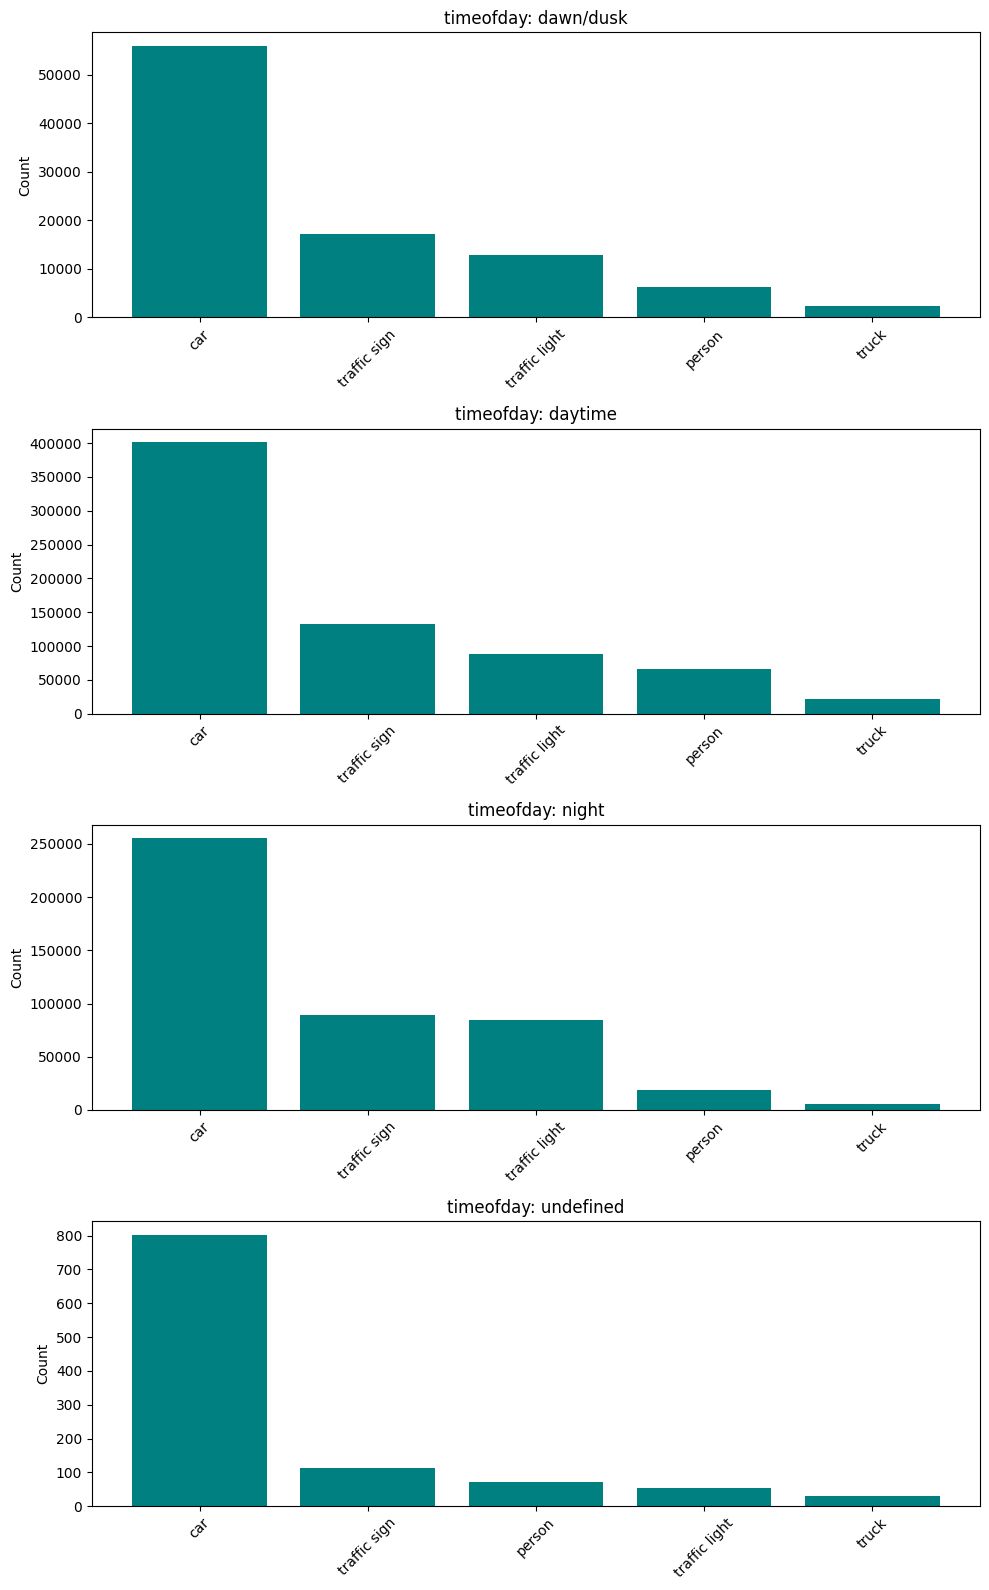

In [62]:
attributes_groupby_plot('timeofday')

### Plotting results based on combination of scene, weather and time of day

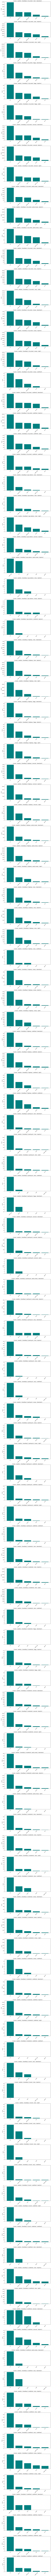

In [63]:
attributes_groupby_plot(['scene','weather','timeofday'])

### Showcase stats of different classes

In [64]:
for col in class_cols:
    print(f"\n Class: {col.upper()}")

    print("\n Grouped by WEATHER:")
    print(train_df.groupby('weather')[col].sum().sort_values(ascending=False))

    print("\n Grouped by SCENE:")
    print(train_df.groupby('scene')[col].sum().sort_values(ascending=False))

    print("\n Grouped by TIMEOFDAY:")
    print(train_df.groupby('timeofday')[col].sum().sort_values(ascending=False))



 Class: MOTOR

 Grouped by WEATHER:
weather
clear            1569
undefined         513
overcast          430
partly cloudy     261
rainy             125
snowy             102
foggy               2
Name: motor, dtype: int64

 Grouped by SCENE:
scene
city street     2372
residential      347
highway          273
parking lot        6
tunnel             2
undefined          2
gas stations       0
Name: motor, dtype: int64

 Grouped by TIMEOFDAY:
timeofday
daytime      2115
night         674
dawn/dusk     211
undefined       2
Name: motor, dtype: int64

 Class: CAR

 Grouped by WEATHER:
weather
clear            372733
overcast         103827
undefined         79964
partly cloudy     55728
snowy             52104
rainy             47681
foggy              1174
Name: car, dtype: int64

 Grouped by SCENE:
scene
city street     448493
highway         158695
residential      98101
parking lot       4592
undefined         2457
tunnel             684
gas stations       189
Name: car, dtype: int6

### Plots depicting the stats for each class

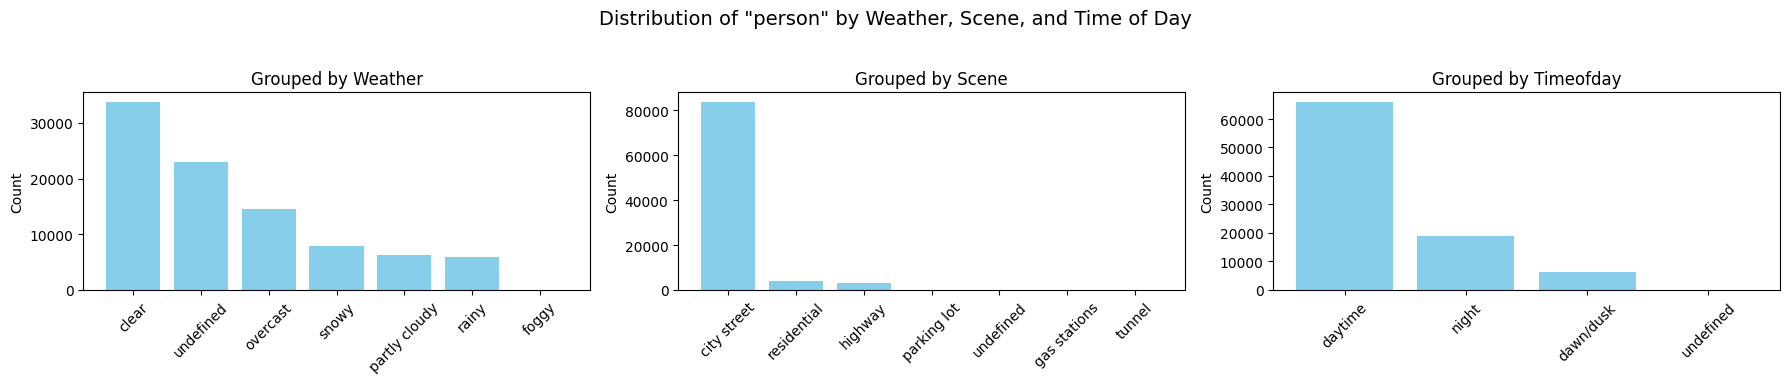

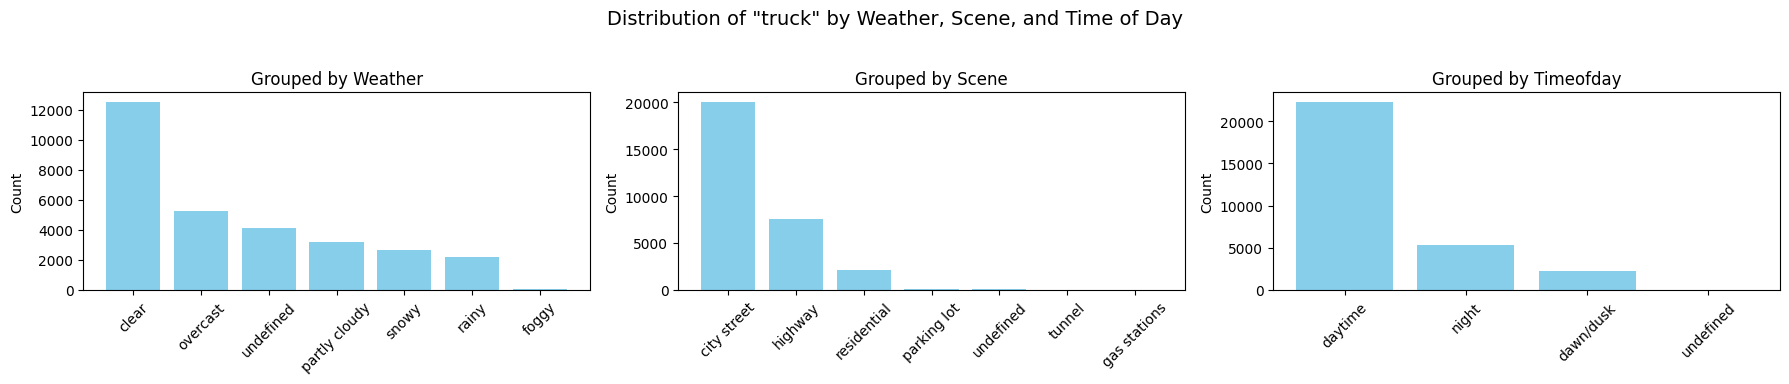

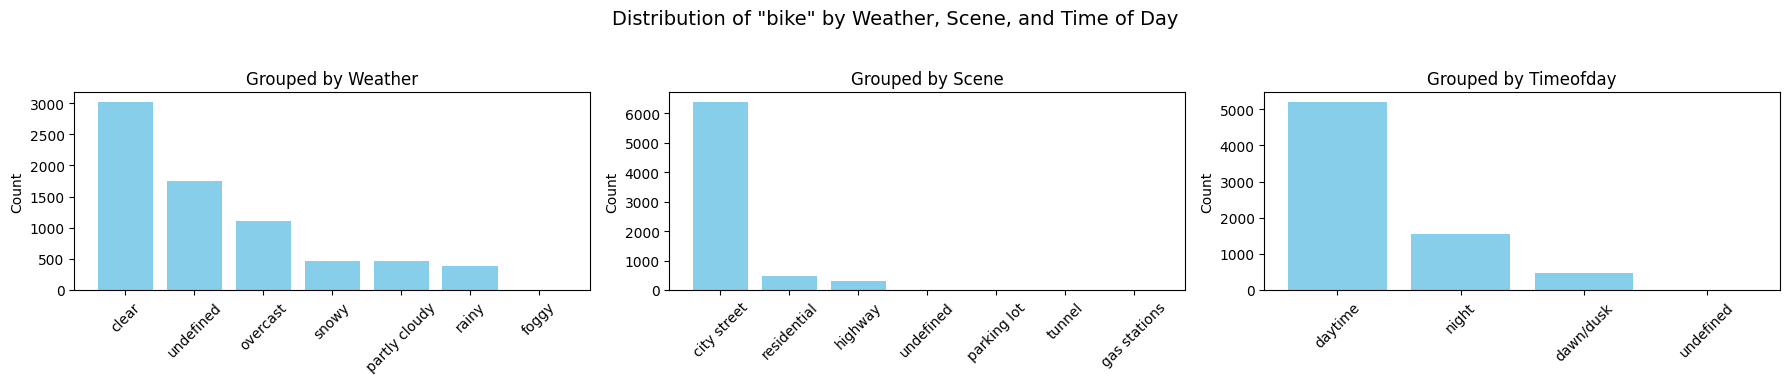

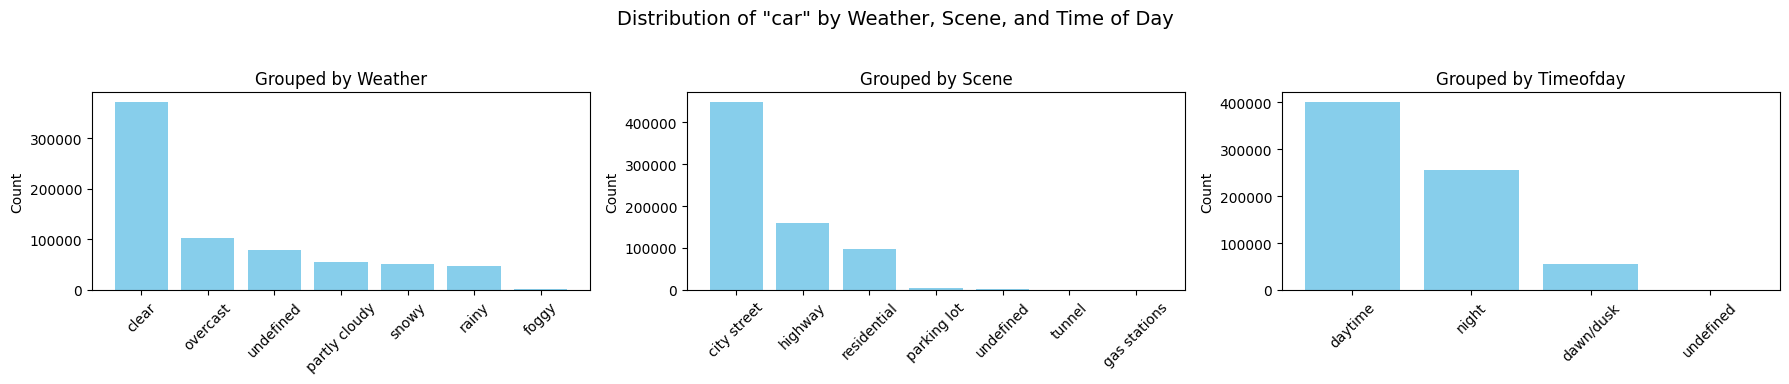

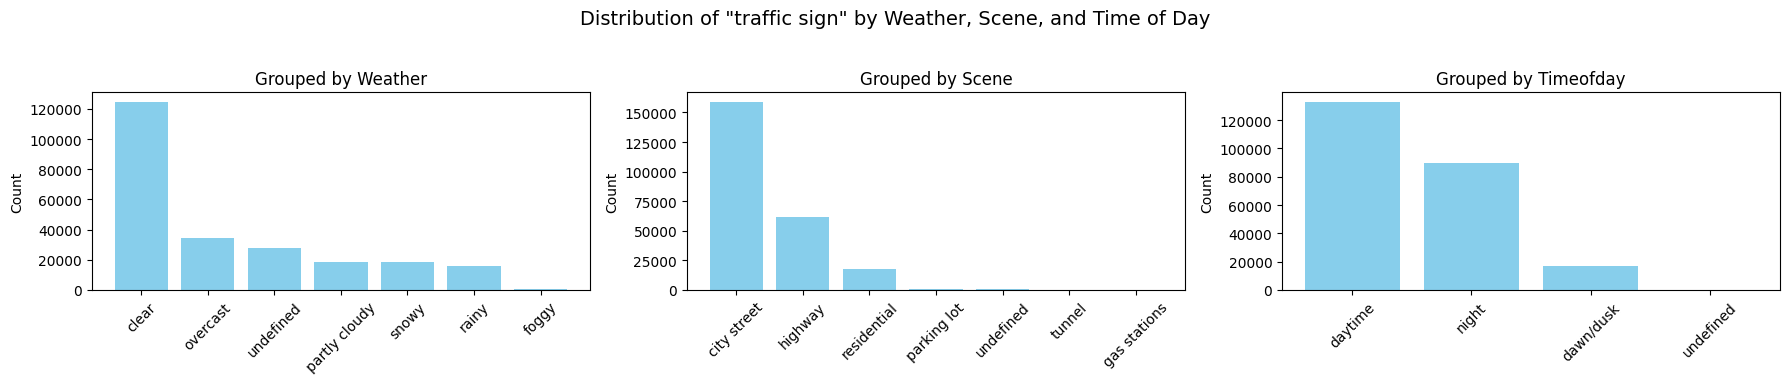

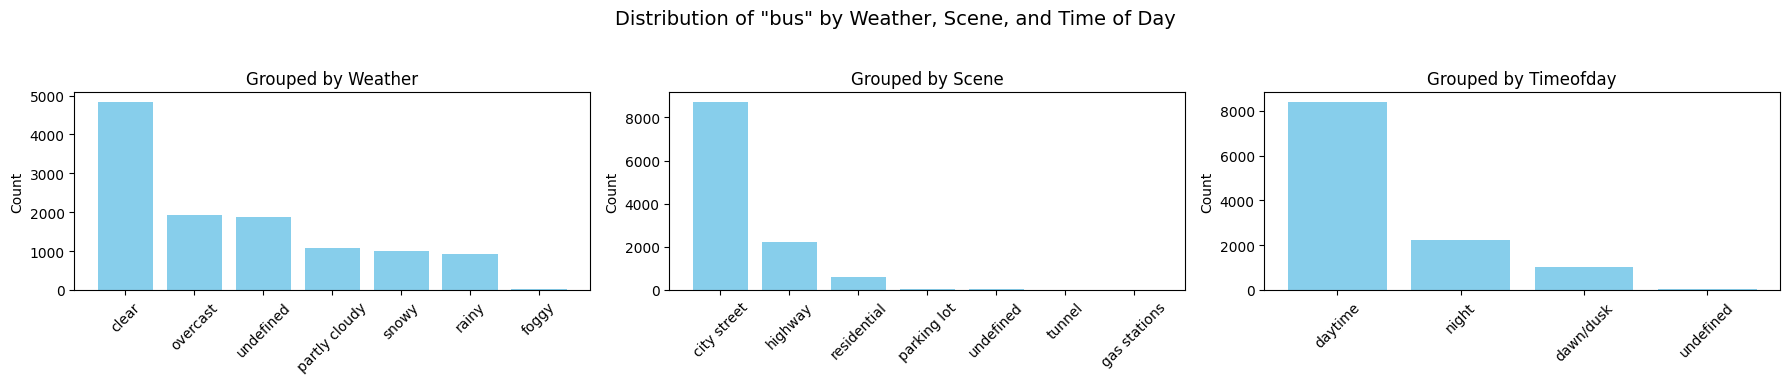

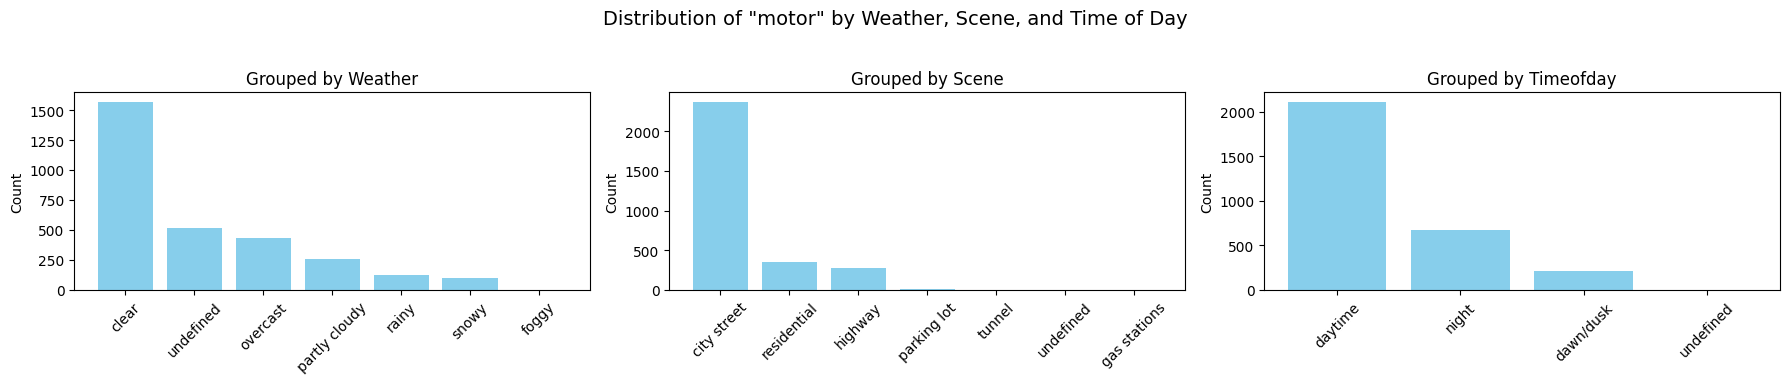

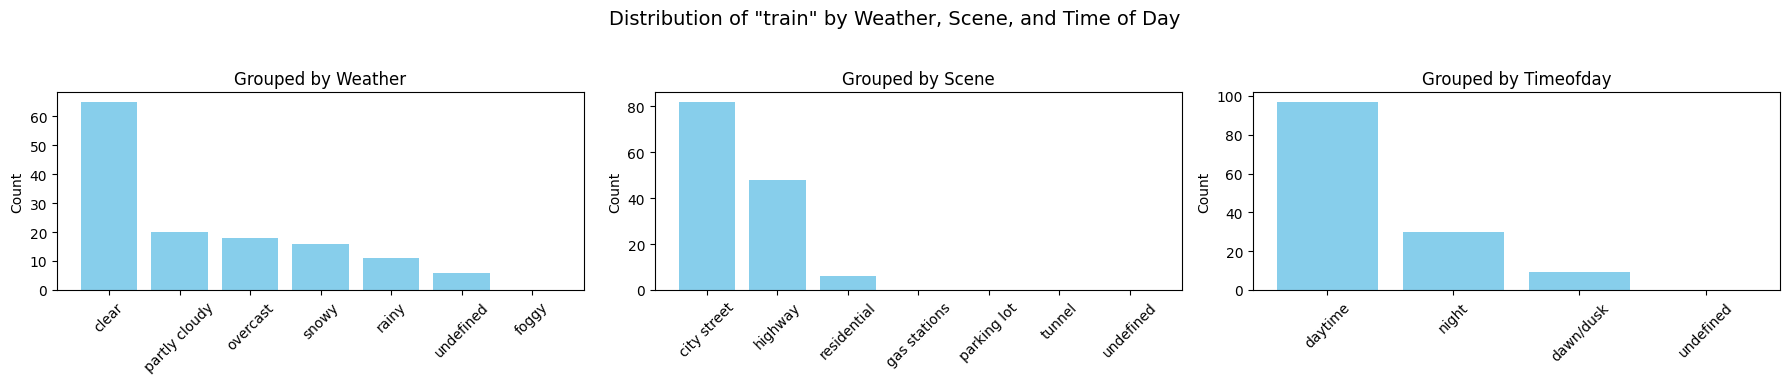

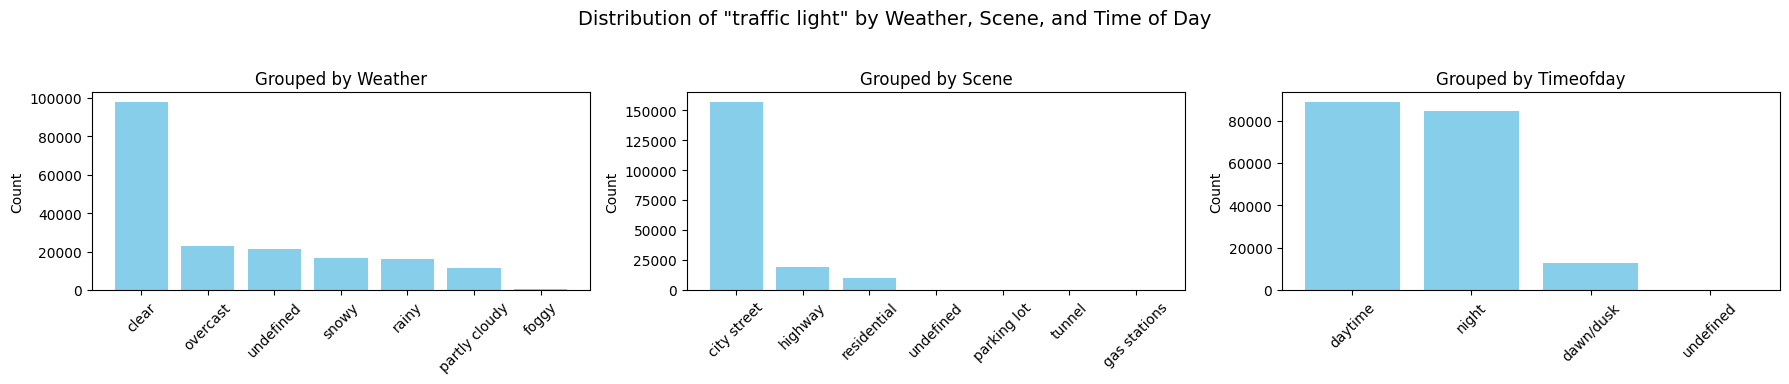

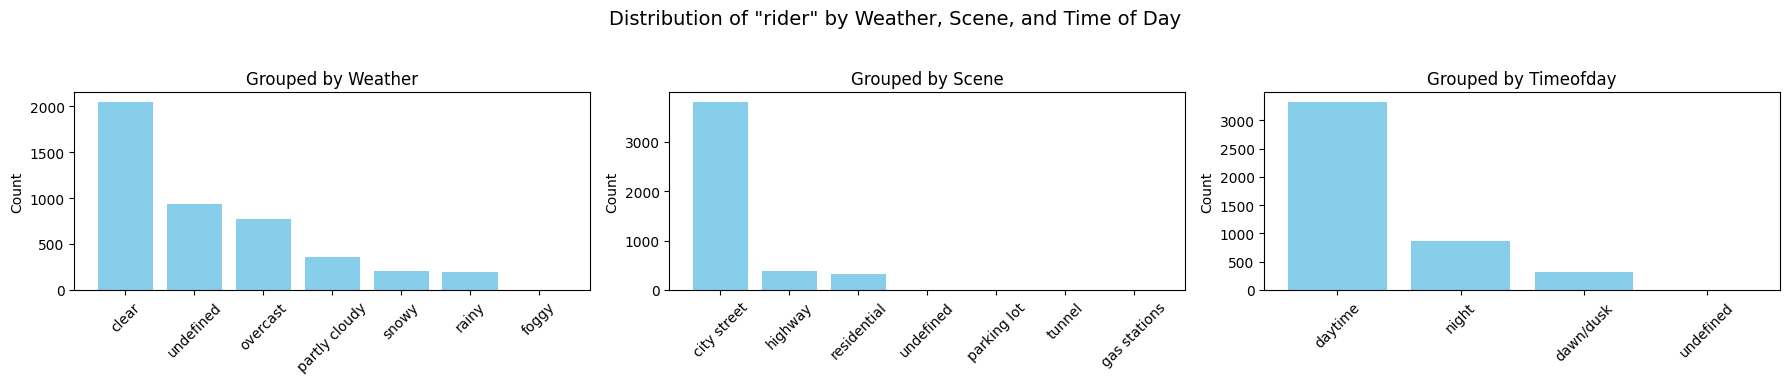

In [65]:
import matplotlib.pyplot as plt

class_cols = ['person',
            #   'lane','drivable area',
              'truck', 'bike', 'car',
              'traffic sign', 'bus',
              'motor', 'train', 'traffic light',
              'rider']

group_cols = ['weather', 'scene', 'timeofday']

for cls in class_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    fig.suptitle(f'Distribution of "{cls}" by Weather, Scene, and Time of Day', fontsize=14)

    for i, group in enumerate(group_cols):
        grouped = train_df.groupby(group)[cls].sum().sort_values(ascending=False)
        axes[i].bar(grouped.index, grouped.values, color='skyblue')
        axes[i].set_title(f'Grouped by {group.capitalize()}')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


### Anamoly and conflict Detection

In [66]:
anomalies = []

for idx, row in train_df.iterrows():
    if row['scene'] == 'highway' and row.get('person', 0) > 0:
        anomalies.append("person in highway")
    if row['scene'] == 'gas stations' and row.get('train', 0) > 0:
        anomalies.append("train in gas station")
    if row['scene'] == 'residential' and row.get('traffic light', 0) > 0:
        anomalies.append("traffic light in residential")
    if row['scene'] == 'tunnel' and row.get('bike', 0) > 0:
        anomalies.append("bike in tunnel")
    if row['scene'] == 'parking lot' and row.get('train', 0) > 0:
        anomalies.append("train in parking lot")
    if row['scene'] == 'residential' and row.get('bus', 0) > 0:
        anomalies.append("bus in residential area")
    if row['scene'] == 'gas stations' and row.get('traffic light', 0) > 0:
        anomalies.append("traffic light in gas station")

    if row['weather'] == 'snowy' and row.get('motor', 0) > 0:
        anomalies.append("motorcycle during snowy weather")
    if row['weather'] == 'foggy' and row.get('bike', 0) > 0:
        anomalies.append("bike during foggy weather")
    if row['weather'] == 'rainy' and row.get('person', 0) > 3:
        anomalies.append("many people during rainy weather")
    if row['weather'] == 'snowy' and row.get('bus', 0) > 0:
        anomalies.append("bus during snowy weather")
    if row['timeofday'] == 'night' and row.get('pedestrian', 0) > 0:
        anomalies.append("pedestrian at night")

    if row['timeofday'] == 'dawn/dusk' and row.get('traffic sign', 0) == 0:
        anomalies.append("no traffic signs during dawn/dusk")
    if row['timeofday'] == 'night' and row.get('bike', 0) > 0:
        anomalies.append("bike during night")


In [67]:
anomaly_summary = pd.Series(anomalies).value_counts().reset_index()
anomaly_summary.columns = ['Anomaly Reason', 'Count']

print(anomaly_summary)

                       Anomaly Reason  Count
0        traffic light in residential   2636
1                   person in highway   1457
2                   bike during night    962
3   no traffic signs during dawn/dusk    916
4            bus during snowy weather    753
5             bus in residential area    544
6    many people during rainy weather    516
7     motorcycle during snowy weather     83
8        traffic light in gas station      7
9           bike during foggy weather      6
10                     bike in tunnel      1


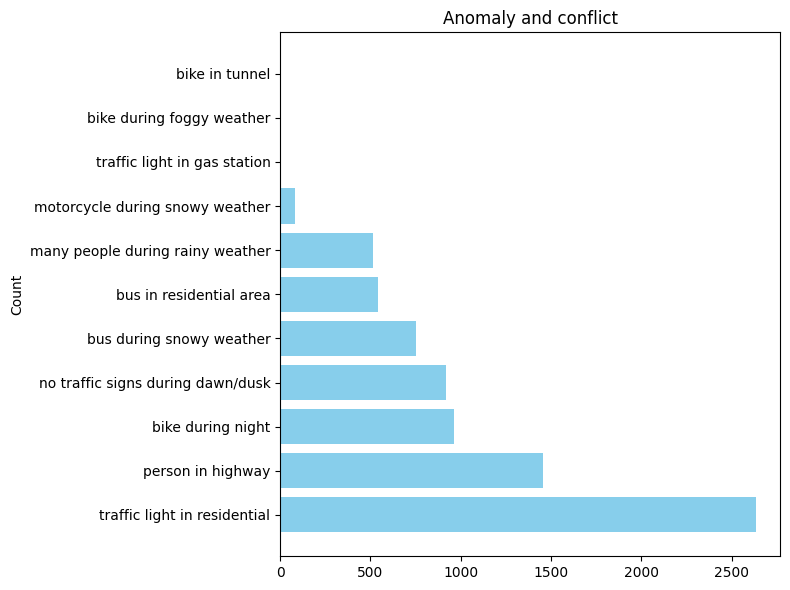

In [69]:
plt.figure(figsize=(8, 6))
plt.barh(anomaly_summary['Anomaly Reason'], anomaly_summary['Count'], color='skyblue')
plt.title(f"Anomaly and conflict")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Analysis of Anomolies
The key findings in this is that since the dataset is collected from the USA, the majority of the anomalies are related to weather, traffic signs and road conditions. Traffic lights in residential areas, person in highway and bike during night are the top 3 anomalies. These are mainly due to the skew of the USA dataset.